## Computer Vision Algorithm for Tracking Planarian Motion
developed by Hokin Deng xueqiandeng@yahoo.com

# Import Dependencies and Data

Import packages and make sure of the python technicality

In [1]:
import sys
import os
print("Python Version:", sys.version)
print("Python Executable:", sys.executable)
print("Python Path:", sys.path)

Python Version: 3.11.4 (main, Jul  5 2023, 08:41:25) [Clang 14.0.6 ]
Python Executable: /Users/billdeng/anaconda3/envs/unlearning_Version1/bin/python
Python Path: ['/Users/billdeng/PycharmProjects/unicellular', '/Users/billdeng/PycharmProjects/unicellular', '/Users/billdeng/anaconda3/envs/unlearning_Version1/lib/python311.zip', '/Users/billdeng/anaconda3/envs/unlearning_Version1/lib/python3.11', '/Users/billdeng/anaconda3/envs/unlearning_Version1/lib/python3.11/lib-dynload', '', '/Users/billdeng/anaconda3/envs/unlearning_Version1/lib/python3.11/site-packages']


In [2]:
import cv2
import math
import copy
import numpy as np
from collections import deque
import numpy as np
import argparse
import imutils
import matplotlib.pyplot as plt
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold=50)

The video data should be named as "sample.avi" and put in the folder as the notebook.

In [3]:
# Open a video file (replace 'sample.avi' with the path)
cap = cv2.VideoCapture('sample.avi')

# Check if the video file was opened successfully
if not cap.isOpened():
    print("Error: Could not open video file.")
    exit()

Display the video if want to have a look at it

In [4]:
#cv2.startWindowThread()
# Loop to read and display frames
#while True:
    # Read a frame from the video
#    ret, frame = cap.read()
    # If the video has ended, break out of the loop
#    if not ret:
#        break
    # Display the frame in a window
#    cv2.imshow('Video', frame)
    # Exit the loop if the 'q' key is pressed
#    if cv2.waitKey(25) & 0xFF == ord('q'):
#        break

# Release the video capture object and close the window

First, get basic properties about our video

In [5]:
# Get basic video properties
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = cap.get(cv2.CAP_PROP_FPS)
video_duration_sec = frame_count / frame_rate if frame_rate > 0 else 0

# Print the video properties
print(f"Frame Count: {frame_count}")
print(f"Frame Width: {frame_width}")
print(f"Frame Height: {frame_height}")
print(f"Frame Rate: {frame_rate} frames per second")
print(f"Video Duration: {video_duration_sec:.2f} seconds")

Frame Count: 1202
Frame Width: 2160
Frame Height: 2160
Frame Rate: 10.0 frames per second
Video Duration: 120.20 seconds


In [6]:
example_ret, example_frame = cap.read()
print( 'ret', type(example_ret))
print( 'frame', type(example_frame))
print('ret', example_ret)
print('frame', example_frame)

ret <class 'bool'>
frame <class 'numpy.ndarray'>
ret True
frame [[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [7]:
# frame_number = 100  # The frame you want to access
# Set the video position to the desired frame
# cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number - 1)
# Read the frame
# ret, frame = cap.read()
# if ret:
    # Process the frame
#     cv2.imshow('Frame 100', frame)
#    cv2.waitKey(0)  # Wait for a key press to close the image window
# else:
#    print("Error: Unable to read the frame")

Inspect function for a frame

In [8]:
def inspect_frame_from_video(cap_for_here, frame_number):
    """
    Inspects a specific frame in a video.

    :param cap_for_here: video reference
    :param frame_number: The frame number to inspect (1-based index).
    :return: None
    """
    # Open the video file
    if not cap_for_here.isOpened():
        print("Error: Unable to open video file")
        return
    # Check if the frame number is valid
    total_frames = cap_for_here.get(cv2.CAP_PROP_FRAME_COUNT)
    if frame_number < 1 or frame_number > total_frames:
        print(f"Frame number should be between 1 and {int(total_frames)}")
        return
    # Set the video position to the desired frame (0-based index for frame_number)
    cap_for_here.set(cv2.CAP_PROP_POS_FRAMES, frame_number - 1)
    # Read the frame
    ret_temp, frame_temp = cap_for_here.read()
    if ret_temp:
        # Display the frame
        # cv2.imshow(f'Frame {frame_number}', frame)
        # cv2.waitKey(0)  # Wait for a key press to close the image window
        # cv2.destroyAllWindows()
        frame_h, frame_w = frame_temp.shape[:2]
        print(f"Frame Width: {frame_h}")
        print(f"Frame Height: {frame_w}")
        # Color Channels
        channels = frame_temp.shape[2] if len(frame_temp.shape) == 3 else 1
        print(f"Color Channels: {channels}")
        # Data Type
        data_type = frame_temp.dtype
        print(f"Data Type: {data_type}")
        # Aspect Ratio
        aspect_ratio = frame_w / frame_h
        print(f"Aspect Ratio: {aspect_ratio}")
        # Resolution (assuming a standard display resolution of 96 PPI)
        # Color Space (assuming default BGR)
        color_space = "BGR" if channels == 3 else "Grayscale"
        print(f"Color Space: {color_space}")
        # Histogram for each channel
        if channels > 1:
            for i, col in enumerate(['Blue', 'Green', 'Red']):
                hist = cv2.calcHist([frame_temp], [i], None, [256], [0, 256])
                print(f"Histogram for {col} channel: {np.array(hist).flatten()}")
        else:
            hist = cv2.calcHist([frame_temp], [0], None, [256], [0, 256])
            print(f"Histogram for Grayscale: {np.array(hist).flatten()}")
    else:
        print("Error: Unable to read the frame")

In [9]:
def inspect_given_a_frame(this_frame):
    frame_h, frame_w = this_frame.shape[:2]
    print(f"Frame Width: {frame_h}")
    print(f"Frame Height: {frame_w}")
    channels = this_frame.shape[2] if len(this_frame.shape) == 3 else 1
    print(f"Color Channels: {channels}")
    data_type = this_frame.dtype
    print(f"Data Type: {data_type}")
    aspect_ratio = frame_w / frame_h
    print(f"Aspect Ratio: {aspect_ratio}")
    color_space = "BGR" if channels == 3 else "Grayscale"
    print(f"Color Space: {color_space}")

In [10]:
# Usage example
video_file = 'sample.avi'
frame_to_inspect = 100  # Adjust the frame number as needed
inspect_frame_from_video(cap, frame_to_inspect)

Frame Width: 2160
Frame Height: 2160
Color Channels: 3
Data Type: uint8
Aspect Ratio: 1.0
Color Space: BGR
Histogram for Blue channel: [      0.       0.       0. ...   31073.   57326. 3775011.]
Histogram for Green channel: [      0.       0.       0. ...   31073.   57326. 3775011.]
Histogram for Red channel: [      0.       0.       0. ...   31073.   57326. 3775011.]


In [11]:
ret, frame_for_use = cap.read()
inspect_given_a_frame(frame_for_use)
cap.release()
cv2.destroyAllWindows()

Frame Width: 2160
Frame Height: 2160
Color Channels: 3
Data Type: uint8
Aspect Ratio: 1.0
Color Space: BGR


## Pre-Processing


Background subtraction

In [13]:
i = 0
# Initialize video capture
cap = cv2.VideoCapture('sample.avi')
# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
# Define codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('background_remove.avi', fourcc, frame_rate, (frame_width, frame_height), False)
backSub = cv2.createBackgroundSubtractorMOG2()
while True:
    i += 1
    ret, frame = cap.read()
    if not ret:
        break
    fgMask = backSub.apply(frame)
    out.write(fgMask)
    print(f'\rProgress: {i}', end='')
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
out.release()
cv2.destroyAllWindows()

Progress: 13

KeyboardInterrupt: 

Spatial Smoothing

In [21]:
i = 0
cap = cv2.VideoCapture('background_remove.avi')
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('background_remove_spatial_smoothed.avi', fourcc, frame_rate, (frame_width, frame_height), False)
while True:
    i += 1
    ret, frame = cap.read()
    if not ret:
        break
    blurred_frame = cv2.GaussianBlur(frame, (5, 5), 0)
    out.write(blurred_frame)
    print(f'\rProgress: {i}', end='')
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
out.release()
cv2.destroyAllWindows()

Progress: 1202

Temporal Smoothing

In [25]:
cap = cv2.VideoCapture('background_remove_spatial_smooth.avi')
fourcc = cv2.VideoWriter_fourcc(*'XVID') # You can also use 'XVID'
out = cv2.VideoWriter('b_r_s_s_t_s.avi', fourcc, frame_rate, (frame_width, frame_height), False)
buffer_size = 5
frame_buffer = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    frame_buffer.append(frame)
    if len(frame_buffer) > buffer_size:
        frame_buffer.pop(0)
    # Temporal smoothing (average of frames in buffer)
    temp_smoothed = np.mean(frame_buffer, axis=0).astype(np.uint8)
    # Write frame to video
    out.write(temp_smoothed)
    # Break the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
out.release()
cv2.destroyAllWindows()

OpenCV: Couldn't read video stream from file "background_remove_spatial_smooth.avi"
[ERROR:0@834.234] global cap.cpp:166 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.8.1) /Users/runner/work/opencv-python/opencv-python/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): background_remove_spatial_smooth.avi in function 'icvExtractPattern'




do everything all at once

In [27]:
# Initialize video capture
cap = cv2.VideoCapture('sample.avi')
# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
# Define codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v') # You can also use 'XVID'
out = cv2.VideoWriter('pre_dense.mp4', fourcc, frame_rate, (frame_width, frame_height), False)
# Background subtractor
backSub = cv2.createBackgroundSubtractorMOG2()
# Buffer for temporal smoothing
buffer_size = 5
frame_buffer = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    # Background subtraction
    fgMask = backSub.apply(frame)
    # Spatial smoothing (Gaussian blur)
    blurred = cv2.GaussianBlur(fgMask, (5, 5), 0)
    # Add frame to buffer for temporal smoothing
    frame_buffer.append(blurred)
    if len(frame_buffer) > buffer_size:
        frame_buffer.pop(0)
    # Temporal smoothing (average of frames in buffer)
    temp_smoothed = np.mean(frame_buffer, axis=0).astype(np.uint8)
    # Write frame to video
    out.write(temp_smoothed)
    # Display result
    # cv2.imshow('Frame', frame)
    # cv2.imshow('FG Mask', fgMask)
    # cv2.imshow('Blurred', blurred)
    # cv2.imshow('Temporally Smoothed', temp_smoothed)
    # Break the loop
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# Release everything
cap.release()
out.release()
cv2.destroyAllWindows()

dense opti flow
this takes a very very long time

In [30]:
cap = cv2.VideoCapture("pre_dense.mp4")
if not cap.isOpened():
    print("Error opening video file")
    exit()
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = cap.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Try 'XVID' if 'mp4v' does not work
out = cv2.VideoWriter('dense_opti_flow_v2.mp4', fourcc, frame_rate, (frame_width, frame_height), True)
ret, first_frame = cap.read()
if not ret:
    print("Error reading first frame")
    cap.release()
    exit()
prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(first_frame)
mask[..., 1] = 255
i = 0
while True:
    i += 1
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    mask[..., 0] = angle * 180 / np.pi / 2
    mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
    out.write(rgb)
    print(f'\rProgress: {i}', end='')
    prev_gray = gray
cap.release()
out.release()
cv2.destroyAllWindows()

Progress: 1201

segment each worm in dense optical flow video

In [11]:
cap = cv2.VideoCapture('dense_opti_flow_v2.mp4')
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = cap.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Try 'XVID' if 'mp4v' does not work
out = cv2.VideoWriter('dense_opt_segmented.mp4', fourcc, frame_rate, (frame_width, frame_height), True)
# Read the first frame
ret, frame1 = cap.read()
if not ret:
    print("Failed to read video")
    cap.release()
prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
j = 0
while True:
    j += 1
    ret, frame2 = cap.read()
    if not ret:
        break
    next = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    # Calculate Optical Flow
    flow = cv2.calcOpticalFlowFarneback(prvs, next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    # Compute magnitude and angle of the flow
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    # Create motion mask
    thresh = 3  # Set threshold for motion detection
    motion_mask = cv2.threshold(mag, thresh, 255, cv2.THRESH_BINARY)[1]
    # Segment mask based on connected components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(np.uint8(motion_mask), connectivity=8)
    min_area = 50  # Minimum area for connected components
    # Draw bounding boxes around components
    for i in range(1, num_labels):
        x, y, w, h, area = stats[i]
        if area > min_area:
            cv2.rectangle(frame2, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # Display the result
    out.write(frame2)
    # cv2.imshow('Segmented Frame', frame2)
    # Update previous frame
    print(f'\rProgress: {j}', end='')
    prvs = next
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
out.release()
cv2.destroyAllWindows()

Progress: 1200

segment each worm without optical flow processing

In [10]:
cap = cv2.VideoCapture('pre_dense.mp4')
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = cap.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Try 'XVID' if 'mp4v' does not work
out = cv2.VideoWriter('predense_degmented.mp4', fourcc, frame_rate, (frame_width, frame_height), True)
# Read the first frame
ret, frame1 = cap.read()
if not ret:
    print("Failed to read video")
    cap.release()
prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
j = 0
while True:
    j += 1
    ret, frame2 = cap.read()
    if not ret:
        break
    next = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    # Calculate Optical Flow
    flow = cv2.calcOpticalFlowFarneback(prvs, next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    # Compute magnitude and angle of the flow
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    # Create motion mask
    thresh = 3  # Set threshold for motion detection
    motion_mask = cv2.threshold(mag, thresh, 255, cv2.THRESH_BINARY)[1]
    # Segment mask based on connected components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(np.uint8(motion_mask), connectivity=8)
    min_area = 50  # Minimum area for connected components
    # Draw bounding boxes around components
    for i in range(1, num_labels):
        x, y, w, h, area = stats[i]
        if area > min_area:
            cv2.rectangle(frame2, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # Display the result
    out.write(frame2)
    # cv2.imshow('Segmented Frame', frame2)
    # Update previous frame
    print(f'\rProgress: {j}', end='')
    prvs = next
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
out.release()
cv2.destroyAllWindows()

Progress: 1201

Define a function for video to image and use it

In [13]:
# Define a function to extract and save frames from a video file
current_location = os.getcwd();
output_folder = current_location + '/raw_images'
video_path = current_location + '/sample.avi'

def video2image(video_path, output_folder):
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Load the video
    video = cv2.VideoCapture(video_path)

    # Initialize frame count
    count = 0

    # Iterate through video frames
    while True:
        # Read a frame
        success, frame = video.read()
        # Break if no frame is read (end of video)
        if not success:
            break
        # Save the frame as an image
        cv2.imwrite(os.path.join(output_folder, f"frame_{count}.jpg"), frame)
        # Increment frame count
        count += 1

    # Release the video object
    video.release()

    return count

Save the video into images

In [14]:
frame_count = video2image(video_path, output_folder)

KeyboardInterrupt: 

Design a crop function that remove the dish

In [16]:
def crop_circle(image_path):
    # Read the image
    image = cv2.imread(image_path)
    # Create a mask with the same dimensions as the image
    mask = np.zeros_like(image)
    rows, cols, _ = mask.shape
    # Compute the center and radius of the circle
    center = (cols // 2, rows // 2)
    radius = min(center[0], center[1], rows - center[1], cols - center[0])
    # Draw the circular mask
    cv2.circle(mask, center, radius, (255, 255, 255), -1)
    # Apply the mask
    circular_image = cv2.bitwise_and(image, mask)
    # Optionally, you can remove the black background
    masked_data = cv2.cvtColor(circular_image, cv2.COLOR_BGR2BGRA)
    masked_data[mask == 0] = [0, 0, 0, 0]
    # Save or display the result
    cv2.imwrite('circular_image.png', masked_data)
    # cv2.imshow('Circular Image', masked_data)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

threshold the original video and set the threshold

In [20]:
thresh = 127

apply to original video

In [21]:
# Load the video
cap = cv2.VideoCapture('sample.avi')
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = cap.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Try 'XVID' if 'mp4v' does not work
out = cv2.VideoWriter('threshold_original.mp4', fourcc, frame_rate, (frame_width, frame_height), True)
# Check if video opened successfully
if not cap.isOpened():
    print("Error opening video file")
# Read until video is completed
j = 0
while cap.isOpened():
    j += 1
    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret:
        # Convert to grayscale
        # Apply threshold for each channel
        _, red_channel = cv2.threshold(frame[:,:,0], thresh, 255, cv2.THRESH_BINARY)
        _, green_channel = cv2.threshold(frame[:,:,1], thresh, 255, cv2.THRESH_BINARY)
        _, blue_channel = cv2.threshold(frame[:,:,2], thresh, 255, cv2.THRESH_BINARY)
    # Combine the channels back
        thresh_frame = cv2.merge([red_channel, green_channel, blue_channel])
        # Display the resulting frame
        out.write(thresh_frame)
        # Press Q on keyboard to exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break
        print(f'\rProgress: {j}', end='')
    else:
        break
# When everything done, release the video capture object
cap.release()
out.release()
cv2.destroyAllWindows()

Progress: 1202

apply erode and dilate

In [26]:
# Load the video
cap = cv2.VideoCapture('pre_dense.mp4')
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = cap.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Try 'XVID' if 'mp4v' does not work
out = cv2.VideoWriter('pre_dense_erode_dilate.mp4', fourcc, frame_rate, (frame_width, frame_height), True)
j = 0
while True:
    j += 1
    # Read each frame
    ret, frame = cap.read()
    if not ret:
        break
    # Apply erosion and then dilation
    eroded_frame = cv2.erode(frame, kernel, iterations=1)
    dilated_frame = cv2.dilate(eroded_frame, kernel, iterations=1)
    # Display the processed frame
    out.write(dilated_frame)
    print(f'\rProgress: {j}', end='')
    # Break the loop with a key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()
out.release()

Progress: 1202

motion segmentation using connectivity after erode and dilate

In [36]:
cap = cv2.VideoCapture('pre_dense_erode_dilate.mp4')
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = cap.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('pre_dense_erode_dilate_segmented.mp4', fourcc, frame_rate, (frame_width, frame_height), True)
# Read the first frame
ret, frame1 = cap.read()
if not ret:
    print("Failed to read video")
    cap.release()
prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
j = 0
while True:
    j += 1
    ret, frame2 = cap.read()
    if not ret:
        break
    next = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    # Calculate Optical Flow
    flow = cv2.calcOpticalFlowFarneback(prvs, next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    # Compute magnitude and angle of the flow
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    # Create motion mask
    thresh = 1  # Set threshold for motion detection
    motion_mask = cv2.threshold(mag, thresh, 255, cv2.THRESH_BINARY)[1]
    cv2.imshow('Segmented Frame', motion_mask)
    # Segment mask based on connected components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(np.uint8(motion_mask), connectivity=8)
    min_area = 300  # Minimum area for connected components
    # Draw bounding boxes around components
    for i in range(1, num_labels):
        x, y, w, h, area = stats[i]
        if area > min_area:
            cv2.rectangle(frame2, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # cv2.imshow('Segmented Frame', frame2)
    # Display the result
    out.write(frame2)
    # Update previous frame
    print(f'\rProgress: {j}', end='')
    prvs = next
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
out.release()
cv2.destroyAllWindows()

Progress: 412

KeyboardInterrupt: 

erode and dilate also motion mask, save motion mask actually

In [65]:
cap = cv2.VideoCapture('pre_dense_erode_dilate.mp4')
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = cap.get(cv2.CAP_PROP_FPS)
erode_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('motion_mask_segmented.mp4', fourcc, frame_rate, (frame_width, frame_height), True)
# Read the first frame
ret, frame1 = cap.read()
if not ret:
    print("Failed to read video")
    cap.release()
prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
j = 0
while True:
    j += 1
    ret, frame2 = cap.read()
    if not ret:
        break
    next = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    # Calculate Optical Flow
    flow = cv2.calcOpticalFlowFarneback(prvs, next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    # Compute magnitude and angle of the flow
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    # Create motion mask
    thresh = 1  # Set threshold for motion detection
    motion_mask = cv2.threshold(mag, thresh, 255, cv2.THRESH_BINARY)[1]
    eroded_frame = cv2.erode(motion_mask, erode_kernel, iterations=1)
    dilated_frame = cv2.dilate(eroded_frame, dilate_kernel, iterations=1)
    # cv2.imshow('Segmented Frame', dilated_frame)
    # Segment mask based on connected components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(np.uint8(dilated_frame), connectivity=8)
    min_area = 300  # Minimum area for connected components
    # Draw bounding boxes around components
    for i in range(1, num_labels):
        x, y, w, h, area = stats[i]
        if area > min_area:
            cv2.rectangle(frame2, (x, y), (x + w, y + h), (0, 255, 0), 2)
    for i in range(1, num_labels):
        x, y, w, h, area = stats[i]
        if area > min_area:
            cv2.rectangle(dilated_frame, (x, y), (x + w, y + h), (255, 255, 255), 2)
    save_frame = cv2.normalize(dilated_frame, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    # cv2.imshow('Segmented Frame', dilated_frame)
    # cv2.imshow('Segmented Frame', frame2)
    # Display the result
    rgb_frame = cv2.cvtColor(save_frame, cv2.COLOR_GRAY2RGB)
    # inspect_given_a_frame(frame2)
    # inspect_given_a_frame(rgb_frame)
    out.write(save_frame)
    # Update previous frame
    print(f'\rProgress: {j}', end='')
    prvs = next
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
out.release()
cv2.destroyAllWindows()

Progress: 1201

In [70]:
cap = cv2.VideoCapture('pre_dense_erode_dilate.mp4')
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = cap.get(cv2.CAP_PROP_FPS)
erode_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 15))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('motion_mask_segmented_v2.mp4', fourcc, frame_rate, (frame_width, frame_height), True)
# Read the first frame
ret, frame1 = cap.read()
if not ret:
    print("Failed to read video")
    cap.release()
prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
j = 0
while True:
    j += 1
    ret, frame2 = cap.read()
    if not ret:
        break
    next = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    # Calculate Optical Flow
    flow = cv2.calcOpticalFlowFarneback(prvs, next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    # Compute magnitude and angle of the flow
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    # Create motion mask
    thresh = 1  # Set threshold for motion detection
    motion_mask = cv2.threshold(mag, thresh, 255, cv2.THRESH_BINARY)[1]
    eroded_frame = cv2.erode(motion_mask, erode_kernel, iterations=1)
    dilated_frame = cv2.dilate(eroded_frame, dilate_kernel, iterations=1)
    # cv2.imshow('Segmented Frame', dilated_frame)
    # Segment mask based on connected components
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(np.uint8(dilated_frame), connectivity=8)
    min_area = 300  # Minimum area for connected components
    # Draw bounding boxes around components
    for i in range(1, num_labels):
        x, y, w, h, area = stats[i]
        if area > min_area:
            cv2.rectangle(frame2, (x, y), (x + w, y + h), (0, 255, 0), 2)
    for i in range(1, num_labels):
        x, y, w, h, area = stats[i]
        if area > min_area:
            cv2.rectangle(dilated_frame, (x, y), (x + w, y + h), (255, 255, 255), 2)
    t_frame = cv2.normalize(dilated_frame, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    # cv2.imshow('Segmented Frame', dilated_frame)
    # cv2.imshow('Segmented Frame', frame2)
    # Display the result
    rgb_frame = cv2.cvtColor(t_frame, cv2.COLOR_GRAY2RGB)
    # inspect_given_a_frame(frame2)
    # inspect_given_a_frame(rgb_frame)
    # inspect_given_a_frame(rgb_frame)
    out.write(rgb_frame)
    # Update previous frame
    print(f'\rProgress: {j}', end='')
    prvs = next
    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
out.release()
cv2.destroyAllWindows()

Progress: 1201

dilate even more for segmentation

## Overlay

In [16]:
original_cap = cv2.VideoCapture('sample.avi')
cap = cv2.VideoCapture('pre_dense_erode_dilate.mp4')
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = cap.get(cv2.CAP_PROP_FPS)
erode_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (45, 45))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('overlay.mp4', fourcc, frame_rate, (frame_width, frame_height), True)
# Read the first frame
ret, frame1 = cap.read()
not_useful, ori_frame = original_cap.read()
if not ret:
    print("Failed to read video")
    cap.release()
prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
j = 0
while True:
    j += 1
    ret, frame2 = cap.read()
    not_useful, ori_frame = original_cap.read()
    if not ret:
        break
    next = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    # Calculate Optical Flow
    flow = cv2.calcOpticalFlowFarneback(prvs, next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    # Compute magnitude and angle of the flow
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    # Create motion mask
    thresh = 1  # Set threshold for motion detection
    motion_mask = cv2.threshold(mag, thresh, 255, cv2.THRESH_BINARY)[1]
    eroded_frame = cv2.erode(motion_mask, erode_kernel, iterations=1)
    dilated_frame = cv2.dilate(eroded_frame, dilate_kernel, iterations=1)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(np.uint8(dilated_frame), connectivity=8)
    min_area = 300
    for i in range(1, num_labels):
        x, y, w, h, area = stats[i]
        if area > min_area:
            cv2.rectangle(frame2, (x, y), (x + w, y + h), (0, 255, 0), 2)
    for i in range(1, num_labels):
        x, y, w, h, area = stats[i]
        if area > min_area:
            cv2.rectangle(dilated_frame, (x, y), (x + w, y + h), (255, 255, 255), 2)
    for i in range(1, num_labels):
        x, y, w, h, area = stats[i]
        if area > min_area:
            cv2.rectangle(ori_frame, (x, y), (x + w, y + h), (250,128,114), 2)
    temp_frame = cv2.normalize(dilated_frame, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    rgb_frame = cv2.cvtColor(temp_frame, cv2.COLOR_GRAY2RGB)
    out.write(ori_frame)
    print(f'\rProgress: {j}', end='')
    prvs = next
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
out.release()
cv2.destroyAllWindows()

Progress: 1201

## Segmentation

Initialize Paths

In [77]:
current_location = os.getcwd();
output_folder = current_location + '/worm_segmentation'
video_path = current_location + '/sample.avi'

Initialize input videos and output videos

In [79]:
motion_mask_cap = cv2.VideoCapture('pre_dense_erode_dilate.mp4')
original_video_cap = cv2.VideoCapture('sample.avi')
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = cap.get(cv2.CAP_PROP_FPS)
erode_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (45, 45))
f_worm_1 = cv2.VideoWriter_fourcc(*'mp4v')
f_worm_2 = cv2.VideoWriter_fourcc(*'mp4v')
f_worm_3 = cv2.VideoWriter_fourcc(*'mp4v')
f_worm_4 = cv2.VideoWriter_fourcc(*'mp4v')
f_worm_5 = cv2.VideoWriter_fourcc(*'mp4v')
f_worm_6 = cv2.VideoWriter_fourcc(*'mp4v')
f_worm_7 = cv2.VideoWriter_fourcc(*'mp4v')
f_worm_8 = cv2.VideoWriter_fourcc(*'mp4v')
f_worm_9 = cv2.VideoWriter_fourcc(*'mp4v')
f_worm_10 = cv2.VideoWriter_fourcc(*'mp4v')
worm_1_out = cv2.VideoWriter(output_folder + '/worm_1_out.mp4', f_worm_1, frame_rate, (frame_width, frame_height), True)
worm_2_out = cv2.VideoWriter(output_folder + '/worm_2_out.mp4', f_worm_2, frame_rate, (frame_width, frame_height), True)
worm_3_out = cv2.VideoWriter(output_folder + '/worm_3_out.mp4', f_worm_3, frame_rate, (frame_width, frame_height), True)
worm_4_out = cv2.VideoWriter(output_folder + '/worm_4_out.mp4', f_worm_4, frame_rate, (frame_width, frame_height), True)
worm_5_out = cv2.VideoWriter(output_folder + '/worm_5_out.mp4', f_worm_5, frame_rate, (frame_width, frame_height), True)
worm_6_out = cv2.VideoWriter(output_folder + '/worm_6_out.mp4', f_worm_6, frame_rate, (frame_width, frame_height), True)
worm_7_out = cv2.VideoWriter(output_folder + '/worm_7_out.mp4', f_worm_7, frame_rate, (frame_width, frame_height), True)
worm_8_out = cv2.VideoWriter(output_folder + '/worm_8_out.mp4', f_worm_8, frame_rate, (frame_width, frame_height), True)
worm_9_out = cv2.VideoWriter(output_folder + '/worm_9_out.mp4', f_worm_9, frame_rate, (frame_width, frame_height), True)
worm_10_out = cv2.VideoWriter(output_folder + '/worm_10_out.mp4', f_worm_10, frame_rate, (frame_width, frame_height), True)

clean up make sure all number is good

In [85]:
total_it_number = 0

if not motion_mask_cap.isOpened():
    print("Error: Could not open motion mask.")
else:
    # Get the total number of frames in the video
    total_it_number = int(motion_mask_cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Total number of frames in the motion mask: {total_it_number}")

if not original_video_cap.isOpened():
    print("Error: Could not open motion mask.")
else:
    # Get the total number of frames in the video
    total_it_number = int(original_video_cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Total number of frames in the original video: {total_it_number}")

print(f"to process the video need to iterate over: {total_it_number}")

Total number of frames in the motion mask: 1202
Total number of frames in the original video: 1202
to process the video need to iterate over: 1202


In [103]:
# Read the first motion
ret, motion_frame_init = motion_mask_cap.read()
if not ret:
    print("Failed to read the motion ask")
    cap.release()
else:
    print("motion frame read")
print("Shape of Frame", motion_frame_init.shape)
print("First Row", motion_frame_init[:,1])
previous_motion_frame = cv2.cvtColor(motion_frame_init, cv2.COLOR_BGR2GRAY)
inspect_given_a_frame(previous_motion_frame)
print("Shape of Frame", previous_motion_frame.shape)
print("First Row", previous_motion_frame[:,1].shape)

motion frame read
Shape of Frame (2160, 2160, 3)
First Row [[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]
Frame Width: 2160
Frame Height: 2160
Color Channels: 1
Data Type: uint8
Aspect Ratio: 1.0
Color Space: Grayscale
Shape of Frame (2160, 2160)
First Row (2160,)


pilot the code a bit

In [152]:
for j in range(total_it_number):
    ret, temporal_motion_frame = motion_mask_cap.read()
    if not ret:
        break
    current_motion_frame = cv2.cvtColor(temporal_motion_frame, cv2.COLOR_BGR2GRAY)
    # Calculate Optical Flow
    flow = cv2.calcOpticalFlowFarneback(previous_motion_frame, current_motion_frame, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    # Compute magnitude and angle of the flow
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    # Create motion mask
    thresh = 1  # Set threshold for motion detection
    motion_mask = cv2.threshold(mag, thresh, 255, cv2.THRESH_BINARY)[1]
    eroded_frame = cv2.erode(motion_mask, erode_kernel, iterations=1)
    dilated_frame = cv2.dilate(eroded_frame, dilate_kernel, iterations=1)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(np.uint8(dilated_frame), connectivity=8)
    print('Number of labels', num_labels, '\n')
    print('labels', labels, '\n')
    print('stats', stats, '\n')
    print('centroids', centroids, '\n')
    min_area = 5000
    for i in range(1, num_labels):
        x, y, w, h, area = stats[i]
        if area > min_area:
            cv2.rectangle(frame2, (x, y), (x + w, y + h), (0, 255, 0), 2)
    for i in range(1, num_labels):
        x, y, w, h, area = stats[i]
        if area > min_area:
            cv2.rectangle(dilated_frame, (x, y), (x + w, y + h), (255, 255, 255), 2)
    temp_frame = cv2.normalize(dilated_frame, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    rgb_frame = cv2.cvtColor(temp_frame, cv2.COLOR_GRAY2RGB)
    cv2.imshow('Segmented Frame', rgb_frame)
    out.write(rgb_frame)
    print(f'\rProgress: {j}', end='')
    prvs = next
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

Number of labels 20 

labels [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

stats [[      0       0    2160    2160 3892687]
 [     59      11    1290     742  217899]
 [   1157      19     116      72    6481]
 ...
 [    223    1553    1687     535  347629]
 [    278    1614      76      76    5593]
 [    175    1622      57      60    3340]] 

centroids [[1097.18925077 1056.30238547]
 [ 637.53835493  294.37785396]
 [1213.91529085   54.33143033]
 [ 865.78622493   64.2190061 ]
 [1493.07880724  262.53887114]
 [1960.71808545  727.44079666]
 [ 758.97357724  821.72811132]
 [ 148.89168689  839.73988673]
 [1085.63219726  899.26891299]
 [ 836.11858407  956.59620733]
 [2026.1287264   964.47492953]
 [ 126.59711969  985.64298681]
 [ 501.42913001 1018.56304985]
 [1546.96204738 1177.76202156]
 [1978.63962196 1296.65338381]
 [ 555.16098081 1161.27078891]
 [1075.6705327  1314.63244551]
 [1079.36621513 1859.52991839]
 [ 315.59

KeyboardInterrupt: 

In [137]:
tye = num_labels, labels, stats, centroids

In [138]:
stats_2 = stats
print(stats_2)

[[      0       0    2160    2160 3761184]
 [    352      75     556     361  103374]
 [    176     452     206     251   24356]
 ...
 [     84    1176      52      58    2967]
 [    222    1451     454     517  112884]
 [    657    1601     315     269   52710]]


In [139]:
hum = stats

In [140]:
hum = np.append(hum, stats_2)
print(hum)

[    0     0  2160 ...   315   269 52710]


make an object array and work with that

In [143]:
hum = np.array(None,dtype=object)
print(hum)
hum = np.append(hum, stats_2)
print(hum)
hum = np.append(hum, stats_2)
print(hum)

None
[None 0 0 ... 315 269 52710]
[None 0 0 ... 315 269 52710]


In [144]:
print(tye[0])

16


In [117]:
print(tye[1])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [119]:
print(tye[2])

[[      0       0    2160    2160 3761184]
 [    352      75     556     361  103374]
 [    176     452     206     251   24356]
 ...
 [     84    1176      52      58    2967]
 [    222    1451     454     517  112884]
 [    657    1601     315     269   52710]]


In [121]:
print(tye[3])

[[1084.05772517 1033.50448981]
 [ 664.56798615  246.686159  ]
 [ 277.20980457  572.43443094]
 [ 741.94100751  796.73690897]
 [1998.75183461  826.73745125]
 [ 129.54917511  936.83551182]
 [ 596.16124214 1012.1808911 ]
 [1149.79611286  949.72895092]
 [1346.26507138  996.13398069]
 [1612.56331062 1682.32551272]
 [1755.13875375 1066.63947831]
 [1564.36063957 1138.98831958]
 [1007.68984885 1243.8482752 ]
 [ 109.5082575  1204.80114594]
 [ 487.12448177 1718.76448389]
 [ 790.01952191 1721.53682413]]


# Construction of a Worm Object
## the idea is that, to make a worm object, this object should be able to take each frame as input,
## find the motion mask to correspond to the worm, and append to the worm object

In [145]:
class Worm:
    def __init__(self, worm_index, original_cap, label_history, stats_history, centroid_history, another_variable_in_case=None):
        self.worm_index = worm_index
        self.original_cap = original_cap
        self.label_history = label_history
        self.stats_history = stats_history
        self.centroid_history = centroid_history
        self.another_variable_in_case = another_variable_in_case

    def display_info(self):
        info = f"worn index: {self.worm_index}, video_cap: {self.original_cap}, label_history: {self.label_history}, stats_history: {self.stats_history}, centroid_history: {self.centroid_history}"
        print(info)

    def update_another_variable(self, another_variable_in_case):
        """Update the car's mileage."""
        if another_variable_in_case >= self.another_variable_in_case:
            self.another_variable_in_case = another_variable_in_case
        else:
            print("Error: another_variable_in_case cannot be reduced.")

# Pilot with Single Worm first before doing 10

Basic set up

In [154]:
current_location = os.getcwd();
output_folder = current_location + '/worm_segmentation'
video_path = current_location + '/sample.avi'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
motion_mask_cap = cv2.VideoCapture('pre_dense_erode_dilate.mp4')
original_video_cap = cv2.VideoCapture('sample.avi')
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = cap.get(cv2.CAP_PROP_FPS)
erode_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (45, 45))
f_worm_1 = cv2.VideoWriter_fourcc(*'mp4v')
worm_1_out = cv2.VideoWriter(output_folder + '/worm_1_out.mp4', f_worm_1, frame_rate, (frame_width, frame_height), True)

loop through the first 1/10 of the video

In [155]:
total_it_number = 0

if not motion_mask_cap.isOpened():
    print("Error: Could not open motion mask.")
else:
    # Get the total number of frames in the video
    total_it_number = int(motion_mask_cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Total number of frames in the motion mask: {total_it_number}")

if not original_video_cap.isOpened():
    print("Error: Could not open motion mask.")
else:
    # Get the total number of frames in the video
    total_it_number = int(original_video_cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print(f"Total number of frames in the original video: {total_it_number}")

print(f"to process the video need to iterate over: {total_it_number}")

total_it_number = int(total_it_number / 10)

print(f"to process the video need to iterate over: {total_it_number}")

Total number of frames in the motion mask: 1202
Total number of frames in the original video: 1202
to process the video need to iterate over: 1202
to process the video need to iterate over: 120


actually, construct the worm object before looping, that means, I need to make the first frame

In [156]:
# Read the first motion
ret, motion_frame_init = motion_mask_cap.read()
if not ret:
    print("Failed to read the motion ask")
    cap.release()
else:
    print("motion frame read")
print("Shape of Frame", motion_frame_init.shape)
print("First Row", motion_frame_init[:,1])
previous_motion_frame = cv2.cvtColor(motion_frame_init, cv2.COLOR_BGR2GRAY)
inspect_given_a_frame(previous_motion_frame)
print("Shape of Frame", previous_motion_frame.shape)
print("First Row", previous_motion_frame[:,1].shape)

motion frame read
Shape of Frame (2160, 2160, 3)
First Row [[122 125 123]
 [122 125 123]
 [122 125 123]
 ...
 [122 125 123]
 [122 125 123]
 [122 125 123]]
Frame Width: 2160
Frame Height: 2160
Color Channels: 1
Data Type: uint8
Aspect Ratio: 1.0
Color Space: Grayscale
Shape of Frame (2160, 2160)
First Row (2160,)


for worm initialization, let us analyze frame by frame

In [168]:
ret, current_motion_frame = motion_mask_cap.read()
current_motion_frame = cv2.cvtColor(current_motion_frame, cv2.COLOR_BGR2GRAY)
# Calculate Optical Flow
flow = cv2.calcOpticalFlowFarneback(previous_motion_frame, current_motion_frame, None, 0.5, 3, 15, 3, 5, 1.2, 0)
# Compute magnitude and angle of the flow
mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
# Create motion mask
thresh = 1  # Set threshold for motion detection
motion_mask = cv2.threshold(mag, thresh, 255, cv2.THRESH_BINARY)[1]
eroded_frame = cv2.erode(motion_mask, erode_kernel, iterations=1)
dilated_frame = cv2.dilate(eroded_frame, dilate_kernel, iterations=1)
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(np.uint8(dilated_frame), connectivity=8)
print('Number of labels', num_labels, '\n')
print('labels', labels, '\n')
print('stats', stats, '\n')
print('centroids', centroids, '\n')
min_area = 5000
for i in range(1, num_labels):
    x, y, w, h, area = stats[i]
    if area > min_area:
        cv2.rectangle(frame2, (x, y), (x + w, y + h), (0, 255, 0), 2)
for i in range(1, num_labels):
    x, y, w, h, area = stats[i]
    if area > min_area:
        cv2.rectangle(dilated_frame, (x, y), (x + w, y + h), (255, 255, 255), 2)
previous_motion_frame = current_motion_frame

Number of labels 15 

labels [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

stats [[      0       0    2160    2160 4053189]
 [   1007     113      55      49    2671]
 [    230     174     469     419   61254]
 ...
 [    210    1552     439     383   79701]
 [    661    1605     233     269   42127]
 [    925    1771     687     321  110995]] 

centroids [[1076.10716771 1038.96927111]
 [1033.96667915  137.01647323]
 [ 447.20854148  372.19179156]
 [ 724.81571429  766.76656593]
 [ 229.5         659.96150696]
 [ 157.62670376  825.81663421]
 [2009.21647819  831.12259227]
 [1139.82959791  931.35348423]
 [ 536.67851315 1064.61985494]
 [1892.99566208 1453.46980554]
 [1569.34704774 1128.23926926]
 [ 984.40143925 1222.87653007]
 [ 469.49696993 1732.43426055]
 [ 760.89351247 1734.60856458]
 [1283.76719672 1933.70655435]] 



5720863
Number of labels 15


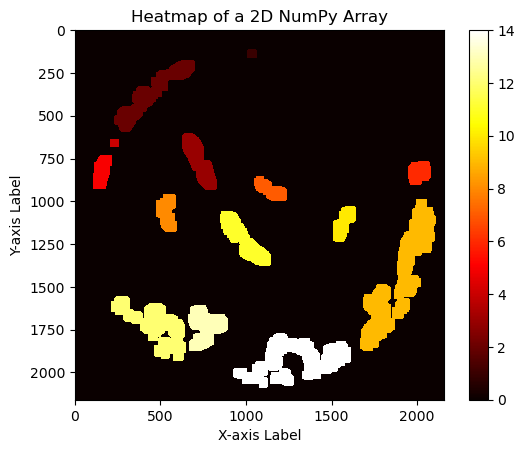

In [169]:
print(sum(sum(labels)))
print('Number of labels', num_labels)

# Create the heatmap
plt.imshow(labels, cmap='hot', interpolation='nearest')

# Adding a colorbar
plt.colorbar()

# Adding titles and labels (optional)
plt.title('Heatmap of a 2D NumPy Array')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# Show the plot
plt.show()

let us look at next frame

In [170]:
ret, current_motion_frame = motion_mask_cap.read()
current_motion_frame = cv2.cvtColor(current_motion_frame, cv2.COLOR_BGR2GRAY)
# Calculate Optical Flow
flow = cv2.calcOpticalFlowFarneback(previous_motion_frame, current_motion_frame, None, 0.5, 3, 15, 3, 5, 1.2, 0)
# Compute magnitude and angle of the flow
mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
# Create motion mask
thresh = 1  # Set threshold for motion detection
motion_mask = cv2.threshold(mag, thresh, 255, cv2.THRESH_BINARY)[1]
eroded_frame = cv2.erode(motion_mask, erode_kernel, iterations=1)
dilated_frame = cv2.dilate(eroded_frame, dilate_kernel, iterations=1)
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(np.uint8(dilated_frame), connectivity=8)
print('Number of labels', num_labels, '\n')
print('labels', labels, '\n')
print('stats', stats, '\n')
print('centroids', centroids, '\n')
min_area = 5000
for i in range(1, num_labels):
    x, y, w, h, area = stats[i]
    if area > min_area:
        cv2.rectangle(frame2, (x, y), (x + w, y + h), (0, 255, 0), 2)
for i in range(1, num_labels):
    x, y, w, h, area = stats[i]
    if area > min_area:
        cv2.rectangle(dilated_frame, (x, y), (x + w, y + h), (255, 255, 255), 2)
previous_motion_frame = current_motion_frame

Number of labels 16 

labels [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]] 

stats [[      0       0    2160    2160 4063528]
 [    543     178     148     118   14349]
 [    234     246     298     340   41847]
 ...
 [    938    1763     497     331   86327]
 [   1441    1815     164     180   23022]
 [    640    1893      82      62    4743]] 

centroids [[1076.19097715 1036.76834662]
 [ 616.94006551  236.16607429]
 [ 381.50087223  421.4054771 ]
 [ 719.34747989  758.0108083 ]
 [ 160.79914384  818.86244292]
 [2010.80818045  834.88231968]
 [1148.1204084   934.91127802]
 [ 539.56878655 1064.20846743]
 [1891.53352391 1459.92351727]
 [1570.9234428  1124.24130952]
 [ 978.13216621 1217.34859756]
 [ 461.12133855 1728.46962833]
 [ 762.96034772 1732.39353617]
 [1211.73433572 1942.56582529]
 [1520.6757015  1901.15420033]
 [ 680.59519292 1923.76154333]] 



5223274
Number of labels 16


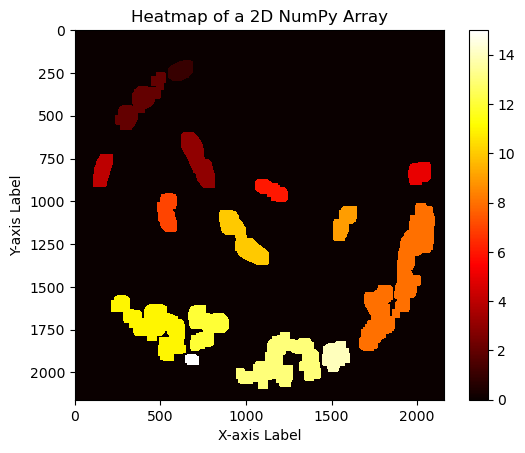

In [171]:
print(sum(sum(labels)))
print('Number of labels', num_labels)

# Create the heatmap
plt.imshow(labels, cmap='hot', interpolation='nearest')

# Adding a colorbar
plt.colorbar()

# Adding titles and labels (optional)
plt.title('Heatmap of a 2D NumPy Array')
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')

# Show
plt.show()

standard initialization

In [ ]:
# reset cap
cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
# Read the first motion
ret, motion_frame_init = motion_mask_cap.read()
if not ret:
    print("Failed to read the motion ask")
    cap.release()
else:
    print("motion frame read")
print("Shape of Frame", motion_frame_init.shape)
print("First Row", motion_frame_init[:,1])
previous_motion_frame = cv2.cvtColor(motion_frame_init, cv2.COLOR_BGR2GRAY)
inspect_given_a_frame(previous_motion_frame)
print("Shape of Frame", previous_motion_frame.shape)
print("First Row", previous_motion_frame[:,1].shape)

loop through the video

In [ ]:
for j in range(total_it_number):
    ret, temporal_motion_frame = motion_mask_cap.read()
    if not ret:
        break
    current_motion_frame = cv2.cvtColor(temporal_motion_frame, cv2.COLOR_BGR2GRAY)
    # Calculate Optical Flow
    flow = cv2.calcOpticalFlowFarneback(previous_motion_frame, current_motion_frame, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    # Compute magnitude and angle of the flow
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    # Create motion mask
    thresh = 1  # Set threshold for motion detection
    motion_mask = cv2.threshold(mag, thresh, 255, cv2.THRESH_BINARY)[1]
    eroded_frame = cv2.erode(motion_mask, erode_kernel, iterations=1)
    dilated_frame = cv2.dilate(eroded_frame, dilate_kernel, iterations=1)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(np.uint8(dilated_frame), connectivity=8)
    print('Number of labels', num_labels, '\n')
    print('labels', labels, '\n')
    print('stats', stats, '\n')
    print('centroids', centroids, '\n')
    min_area = 5000










    for i in range(1, num_labels):
        x, y, w, h, area = stats[i]
        if area > min_area:
            cv2.rectangle(frame2, (x, y), (x + w, y + h), (0, 255, 0), 2)
    for i in range(1, num_labels):
        x, y, w, h, area = stats[i]
        if area > min_area:
            cv2.rectangle(dilated_frame, (x, y), (x + w, y + h), (255, 255, 255), 2)
    temp_frame = cv2.normalize(dilated_frame, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    rgb_frame = cv2.cvtColor(temp_frame, cv2.COLOR_GRAY2RGB)
    cv2.imshow('Segmented Frame', rgb_frame)
    out.write(rgb_frame)
    print(f'\rProgress: {j}', end='')
    prvs = next
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

## Cut to 1/4 of the original for easy processing

In [17]:
# Initialize video capture
cap = cv2.VideoCapture('sample.avi')
# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
# Define codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('shorter.mp4', fourcc, frame_rate, (frame_width, frame_height), True)
for i in range(int(frame_count/4)):
    ret, frame = cap.read()
    if not ret:
        break
    out.write(frame)
    print(f'\rProgress: {i}', end='')
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
out.release()
cv2.destroyAllWindows()

Progress: 299

## Background Subtraction, Spatial Smoothing, Temporal Smoothing

In [18]:
# Initialize video capture
cap = cv2.VideoCapture('shorter.mp4')
# Get video properties
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
# Define codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v') # You can also use 'XVID'
out = cv2.VideoWriter('processed_v1.mp4', fourcc, frame_rate, (frame_width, frame_height), False)
# Background subtractor
backSub = cv2.createBackgroundSubtractorMOG2()
# Buffer for temporal smoothing
buffer_size = 5
frame_buffer = []
while True:
    ret, frame = cap.read()
    if not ret:
        break
    # Background subtraction
    fgMask = backSub.apply(frame)
    # Spatial smoothing (Gaussian blur)
    blurred = cv2.GaussianBlur(fgMask, (5, 5), 0)
    # Add frame to buffer for temporal smoothing
    frame_buffer.append(blurred)
    if len(frame_buffer) > buffer_size:
        frame_buffer.pop(0)
    # Temporal smoothing (average of frames in buffer)
    temp_smoothed = np.mean(frame_buffer, axis=0).astype(np.uint8)
    # Write frame to video
    out.write(temp_smoothed)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
# Release everything
cap.release()
out.release()
cv2.destroyAllWindows()

## Erode and Dilate

In [19]:
# Load the video
cap = cv2.VideoCapture('processed_v1.mp4')
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = cap.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('processed_v2.mp4', fourcc, frame_rate, (frame_width, frame_height), True)
j = 0
while True:
    j += 1
    # Read each frame
    ret, frame = cap.read()
    if not ret:
        break
    # Apply erosion and then dilation
    eroded_frame = cv2.erode(frame, kernel, iterations=1)
    dilated_frame = cv2.dilate(eroded_frame, kernel, iterations=1)
    # Display the processed frame
    out.write(dilated_frame)
    print(f'\rProgress: {j}', end='')
    # Break the loop with a key press
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
cap.release()
cv2.destroyAllWindows()
out.release()

Progress: 300

## Overlay

In [20]:
original_cap = cv2.VideoCapture('shorter.mp4')
cap = cv2.VideoCapture('processed_v2.mp4')
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_rate = cap.get(cv2.CAP_PROP_FPS)
erode_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (45, 45))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('processed_v3.mp4', fourcc, frame_rate, (frame_width, frame_height), True)
# Read the first frame
ret, frame1 = cap.read()
not_useful, ori_frame = original_cap.read()
if not ret:
    print("Failed to read video")
    cap.release()
prvs = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
j = 0
while True:
    j += 1
    ret, frame2 = cap.read()
    not_useful, ori_frame = original_cap.read()
    if not ret:
        break
    next = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)
    # Calculate Optical Flow
    flow = cv2.calcOpticalFlowFarneback(prvs, next, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    # Compute magnitude and angle of the flow
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
    # Create motion mask
    thresh = 1  # Set threshold for motion detection
    motion_mask = cv2.threshold(mag, thresh, 255, cv2.THRESH_BINARY)[1]
    eroded_frame = cv2.erode(motion_mask, erode_kernel, iterations=1)
    dilated_frame = cv2.dilate(eroded_frame, dilate_kernel, iterations=1)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(np.uint8(dilated_frame), connectivity=8)
    min_area = 300
    for i in range(1, num_labels):
        x, y, w, h, area = stats[i]
        if area > min_area:
            cv2.rectangle(frame2, (x, y), (x + w, y + h), (0, 255, 0), 2)
    for i in range(1, num_labels):
        x, y, w, h, area = stats[i]
        if area > min_area:
            cv2.rectangle(dilated_frame, (x, y), (x + w, y + h), (255, 255, 255), 2)
    for i in range(1, num_labels):
        x, y, w, h, area = stats[i]
        if area > min_area:
            cv2.rectangle(ori_frame, (x, y), (x + w, y + h), (250,128,114), 2)
    temp_frame = cv2.normalize(dilated_frame, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    rgb_frame = cv2.cvtColor(temp_frame, cv2.COLOR_GRAY2RGB)
    out.write(ori_frame)
    print(f'\rProgress: {j}', end='')
    prvs = next
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
out.release()
cv2.destroyAllWindows()

Progress: 299